<a href="https://colab.research.google.com/github/Cristalreal/Cristalreal/blob/main/ML_Supervised_(Ensemble_methods).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("hello")

hello


Ensemble Methods
  * Stacking - Where you take multiple different algorithms and models and you train them all on the same dataset. you take th eoutput from each model and put them into a final deicision algorithm and that will help you choose the best output for you.
   Stacking - same dataset, different models, trained in parallel

  * Bagging (bootstrap AGGregating) - Where we take lots of occurrences of the same model and we train them on different subsets. They each produce an answer and we take an average of all the results. EX: random forest (phone camera making boxes around peoples faces to detect them.)
    Bagging - different subsets, same models, trained in parallel

  * Boosting - Use same model and train it on initial dataset. Produce predicitons and see how well it compares to the preicitons. We them train a new model on the bad predicitions to teach the model how to deal with bad cases/predicitions (learns from its mistakes like a search engine autopredicted what you want to fill in).
   Boosting - subsets of bad estimates, same models, trained in series to learn from its mistakes

 ## Using Bagging (Random Forests) for a classification problem

In [3]:
 ## Using Bagging (Random Forests) for a classification problem

 # import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# load penguins data and define (=) penguins variable
penguins = sns.load_dataset('penguins')

# prepare and define our data and targets
feature_names = ['bill_length_mm', 'bill_depth_mm',
                 'flipper_length_mm', 'body_mass_g']
penguins.dropna(subset=feature_names, inplace=True)

species_names = penguins['species'].unique()

X = penguins[feature_names]
y = penguins.species

# Split data in training and test set and this is determined by the dataset (usually do 20% or .2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("train size:", X_train.shape) # (number in y is the number of columns)
print("test size", X_test.shape)

train size: (273, 4)
test size (69, 4)


In [4]:
from sklearn.tree import DecisionTreeClassifier

# define our model
tree = DecisionTreeClassifier()

# train our model
tree.fit(X_train, y_train)

# test our model
tree.predict(X_test)
print(tree.score(X_test, y_test))

0.9420289855072463


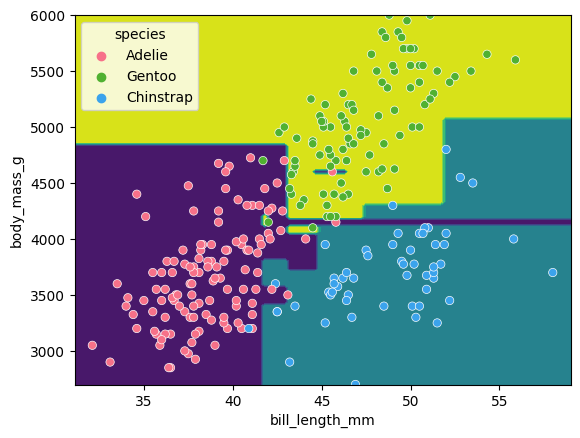

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# define two features to visualise
f1 = feature_names[0]
f2 = feature_names[3]

# create new decision tree classifer called tree_2d - redifine and get a 2d plot
tree_2d = DecisionTreeClassifier()
tree_2d.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(tree_2d, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl")
plt.show()
# the output shows that we have overtuned our model to create little islands of
# decisions to capture the species

In [7]:
## Lets actually make an random forest and learn how ensemble methods work
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Define our model
# extra parameter called n_estimators which is number of trees in the forest
# a leaf is a class label at the end of the decision tree
forest = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1)

# train our model
forest.fit(X_train, y_train)

# compare our models
print(tree.score(X_test, y_test))
print(forest.score(X_test, y_test))

0.9420289855072463
0.9855072463768116


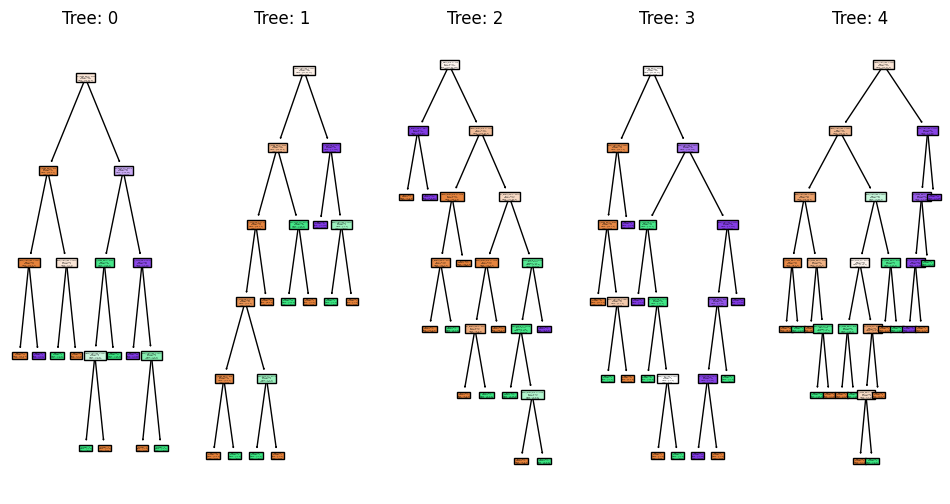

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5 ,figsize=(12,6))

# plot first 5 trees in forest
for index in range(0, 5):
    plot_tree(forest.estimators_[index],
        class_names=species_names,
        feature_names=feature_names,
        filled=True,
        ax=axes[index])

    axes[index].set_title(f'Tree: {index}')
# this will create a decision tree plot for the first 5 trees in our forest
plt.show()

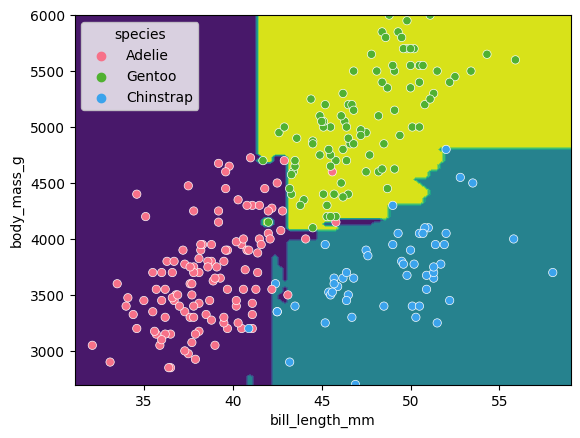

In [9]:
# plot classification space for body mass and bill length with random forest
forest_2d = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1, random_state=5)
forest_2d.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(forest_2d, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl")

plt.show()

In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Define our model
# extra parameter called n_estimators which is number of trees in the forest
# a leaf is a class label at the end of the decision tree
forest = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1)

# train our model
forest.fit(X_train, y_train)

# compare our models
print(tree.score(X_test, y_test))
print(forest.score(X_test, y_test))


0.9420289855072463
0.9710144927536232


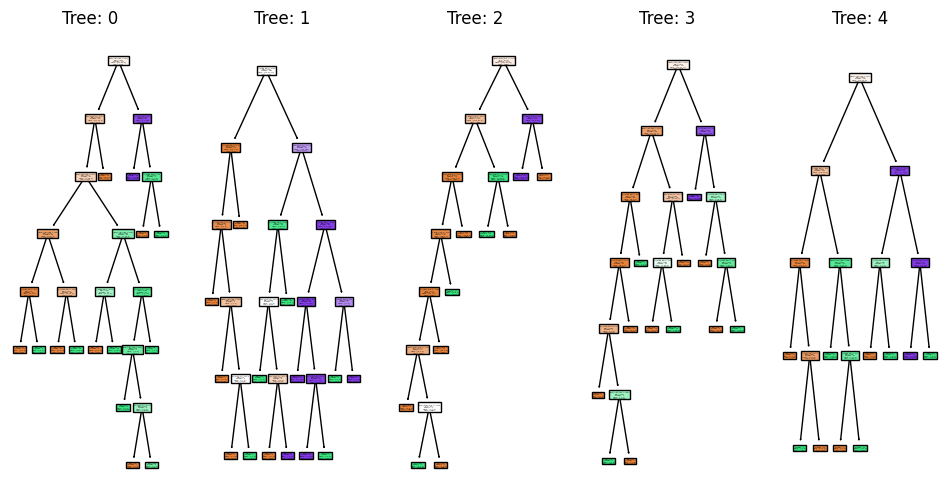

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5 ,figsize=(12,6))

# plot first 5 trees in forest
for index in range(0, 5):
    plot_tree(forest.estimators_[index],
        class_names=species_names,
        feature_names=feature_names,
        filled=True,
        ax=axes[index])

    axes[index].set_title(f'Tree: {index}')

plt.show()

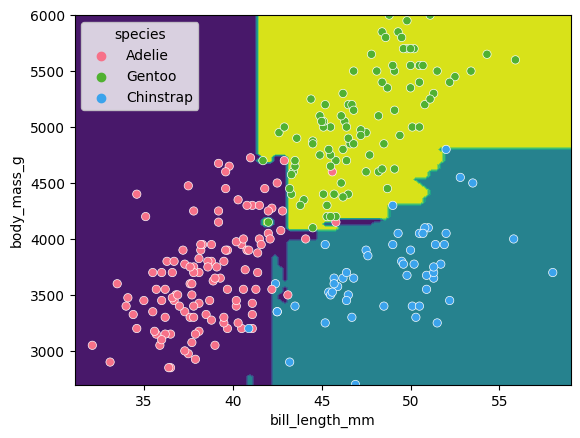

In [12]:
# plot classification space for body mass and bill length with random forest
forest_2d = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1, random_state=5)
forest_2d.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(forest_2d, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl")

# the output shows that it is not overfittig as much as the previos plot and it is holding itself back.
# We dont want a model that is too complex and overtuned but we do want it to be as accurate as possible
# We can probably throw some penguins at this model adn get the majority of them right since this is 97% accurate
plt.show()

# Stacking a regression problem


In [13]:
# The first thing we need to do to tackle a problem with ML is import libraries and datasets
from sklearn.datasets import load_diabetes

print(load_diabetes())

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [14]:
from sklearn.model_selection import train_test_split

# load in data into an x and y variable value
X, y = load_diabetes(return_X_y=True)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (353, 10)
test size: (89, 10)


Take a stack of
* linear regressor,
* use a random forest regressor, (ensemble models/methods)
* and use a gradient boost regressor

In [15]:
# Import the 3 types of models you want to stack together (the classifers)
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)

# fourth model will take the outputs of the top 3 models and make a decision for it
from sklearn.linear_model import LinearRegression

# training estimators (instantiate classifiers)
rf_reg = RandomForestRegressor(random_state=5)
gb_reg = GradientBoostingRegressor(random_state=5)
linear_reg = LinearRegression()

# fit estimators (classifiers)
rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)

# Define the voting regressor and train the voting regressor
# the following letters in "" are ambiguios
voting_reg = VotingRegressor([("gb", rf_reg), ("rf", gb_reg), ("lr", linear_reg)])
voting_reg.fit(X_train, y_train)

#the code will crete a stack of models that need to be plotted and trained next

VotingRegressor(estimators=[('gb', RandomForestRegressor(random_state=5)),
                            ('rf', GradientBoostingRegressor(random_state=5)),
                            ('lr', LinearRegression())])

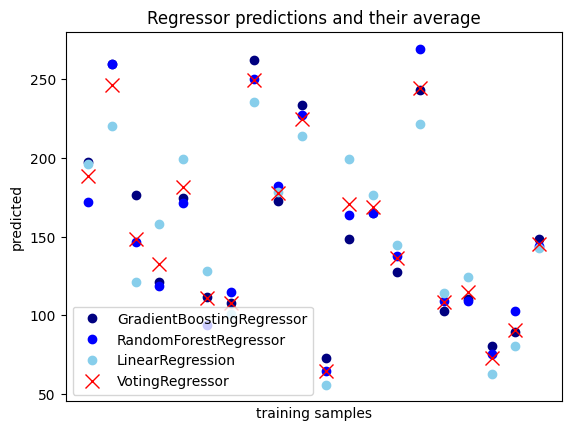

In [16]:
import matplotlib.pyplot as plt

# make predictions
X_test_20 = X_test[:20] # first 20 samples only for visualisation

#take all of these models below and make predictions using all of them
rf_pred = rf_reg.predict(X_test_20)
gb_pred = gb_reg.predict(X_test_20)
linear_pred = linear_reg.predict(X_test_20)
voting_pred = voting_reg.predict(X_test_20)

# plot the predictions to visualize
plt.figure()
plt.plot(rf_pred,  "o", color="navy", label="GradientBoostingRegressor") #model 1
plt.plot(gb_pred,  "o", color="blue", label="RandomForestRegressor") #model 2
plt.plot(linear_pred,  "o", color="skyblue", label="LinearRegression") #model 3
plt.plot(voting_pred,  "x", color="red", ms=10, label="VotingRegressor") #average values of the 3 models above

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

#plot show predictions and the average
plt.show()

In [17]:
# see how the average compares against each single estimator in the stack

print(f'random forest: {rf_reg.score(X_test, y_test)}')

print(f'gradient boost: {gb_reg.score(X_test, y_test)}')

print(f'linear regression: {linear_reg.score(X_test, y_test)}')

print(f'voting regressor: {voting_reg.score(X_test, y_test)}')

# output shows that the random forest, gradiet boost, and linear regression all perform worse and have worse accuracy percentage than the ensemble/voting regressor (average)
# we need to tweak the hyperparamenters, or adjusting our training data features and train-test-split data to improve our accuracy store

random forest: 0.526627803806025
gradient boost: 0.5290702255768158
linear regression: 0.5271558947230806
voting regressor: 0.5520305568906223
